In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

In [43]:
df=pd.read_csv('product i.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [44]:
sales_i= df.drop(['Product Name','Product Category','Month','Year','Market Size', 'Month No.','Marketing Expense'],axis=1)

In [45]:
sales_i.shape

(60, 1)

In [46]:
sales_i.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [47]:
sales_i['Sales'].sum()

5783407

Text(0.5, 1.0, 'Product I')

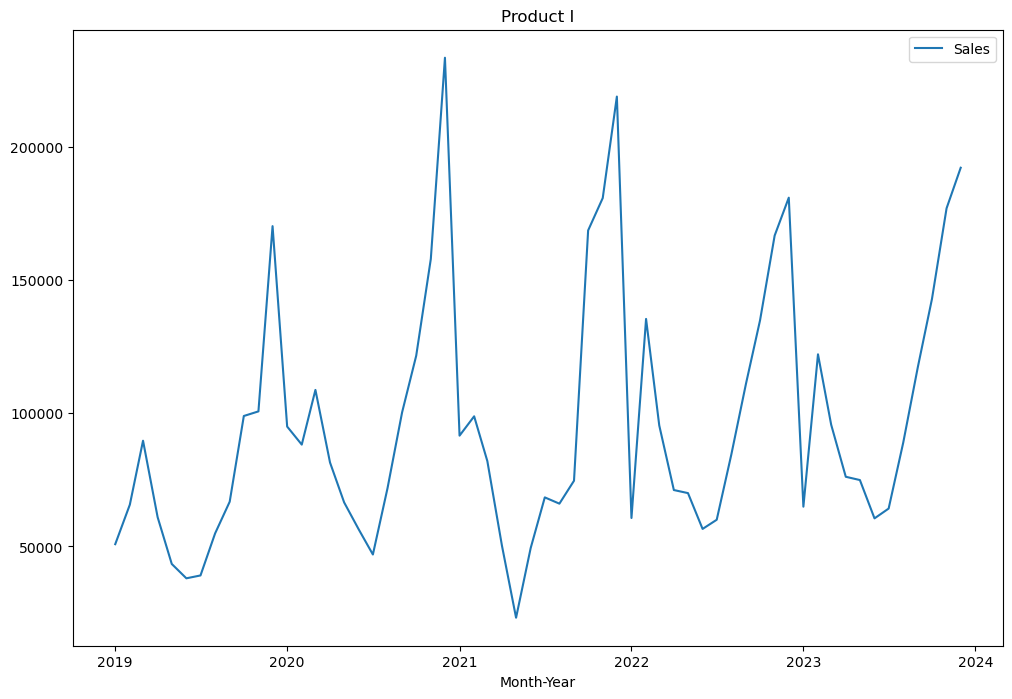

In [48]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_i)
plt.title('Product I')

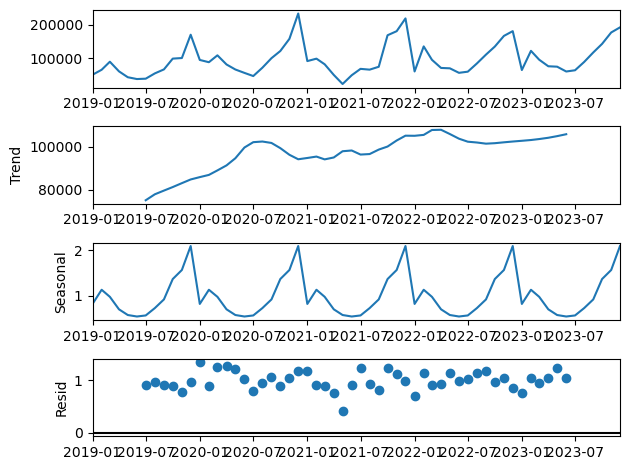

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_i, model='multiplicative', period=12)

# Plot the decomposition
fig = decomposition.plot()
plt.show()



In [50]:
train= sales_i[:48]
test=sales_i[48:]

In [51]:
len(train)

48

In [52]:
model=ExponentialSmoothing(train,trend='mul', seasonal='add', seasonal_periods=12).fit()

C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [53]:
pred=model.forecast(12)

In [54]:
pred

2023-01-01     93465.583533
2023-02-01    117798.769388
2023-03-01    104657.204507
2023-04-01     75767.359181
2023-05-01     59922.635948
2023-06-01     59674.321020
2023-07-01     66406.647769
2023-08-01     78018.283238
2023-09-01     93274.859428
2023-10-01    142156.403307
2023-11-01    158341.374280
2023-12-01    218728.473517
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Product I')

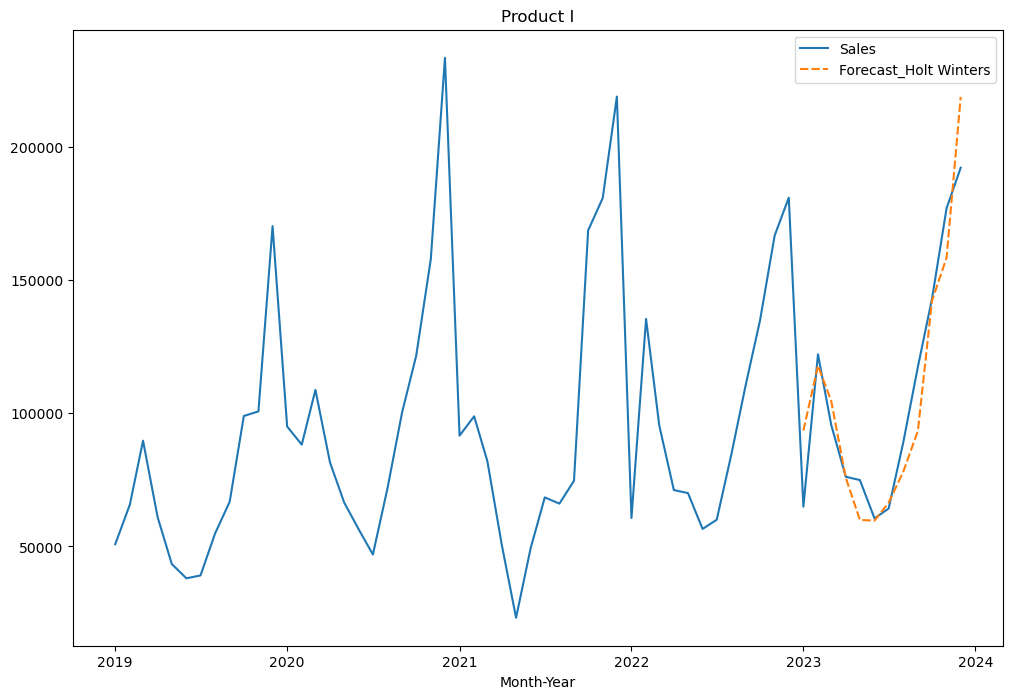

In [55]:
sales_i['Forecast_Holt Winters']=[None]*len(train) + list(pred)
plt.figure(figsize=(12,8))
sns.lineplot(sales_i)
plt.title('Product I')

In [56]:
mae= mean_absolute_error(test,pred)
mse=mean_squared_error(test, pred)
mape= mean_absolute_percentage_error(test,pred)
rmse= np.sqrt(mean_squared_error(test, pred))

print(f'MAE - Holt Winters: {mae}')
print(f'MAPE - Holt Winters: {mape}')
print(f'MSE - Holt Winters: {mse}')
print(f'RMSE - Holt Winters: {rmse}')

MAE - Holt Winters: 11755.741961330883
MAPE - Holt Winters: 0.1165233071134099
MSE - Holt Winters: 241165863.5030273
RMSE - Holt Winters: 15529.515881154419
